In [1]:
%pylab inline

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-08-23 13:29:59,124 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [6]:
ncf = NCFile('/data/readout/2016-08-22_181539_scan_lo_790.0_MHz.nc')

In [7]:
swa = ncf.SweepArray0

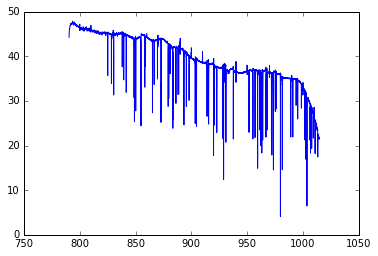

In [8]:
plot(swa.frequency_MHz,dB(swa.s21_point))

In [9]:
from kid_readout.analysis.resonator import find_resonators

In [10]:
res = find_resonators.find_resonators(swa.frequency,swa.s21_point,swa.s21_point_error)

INFO     2016-08-23 13:32:53,432 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 879234731.1  879747117.3
INFO     2016-08-23 13:33:13,042 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 967911941.1  968083804.6
INFO     2016-08-23 13:33:14,024 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 972116544.7  971807158.4
INFO     2016-08-23 13:33:14,874 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 971807553.9  972117270.5


In [20]:
res = find_resonators.remove_duplicates(res)

found duplicate of  791640625.028 distance 31250.028196
found duplicate of  796999927.081 distance 3893.45068157
found duplicate of  798748473.014 distance 29.0021237135
found duplicate of  799998833.542 distance 40.007240057
found duplicate of  799998822.186 distance 51.3628730774
found duplicate of  799998818.068 distance 55.4806411266
found duplicate of  799998593.951 distance 279.598174572
found duplicate of  799998614.143 distance 259.40659976
found duplicate of  809278889.087 distance 41984.9856877
found duplicate of  811875704.04 distance 13.4426259995
found duplicate of  813660037.626 distance 10.7954243422
found duplicate of  816359374.656 distance 31249.6725603
found duplicate of  817250000.0 distance 31249.9999973
found duplicate of  817997685.876 distance 399.952748775
found duplicate of  819999028.754 distance 190.097675085
found duplicate of  819999049.742 distance 211.085270047
found duplicate of  819974311.86 distance 24526.7959641
found duplicate of  819999756.564 dist

In [21]:
len(res)

117

In [28]:
res1 = res[101]

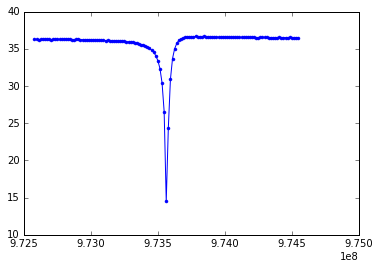

In [33]:
plot(res1.frequency,dB(res1.data),'.-')

In [34]:
# current fit parameters:
res1.current_params

Parameters([('delay',
             <Parameter 'delay', -3.5799651820357889e-07, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', -2.657147055222655, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=972578125.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 66.099682837421099, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', 3.4674720553029637e-10, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 973576796.21184409, bounds=[972578125.0:974546875.0]>),
            ('Q',
             <Parameter 'Q', 9462.4611036527422, bounds=[49.450793650793656:62308.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 9442.2423268462953, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', 2228.1578415632248, bounds=[-10000000.0:10000000.0]>)])

In [35]:
#evaluate the model at a set of frequencies
model_s21 = res1.model.eval(params=res1.current_params, # you have to tell it what parameters to use
                            f=res1.frequency)

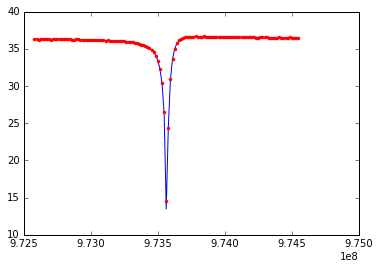

In [37]:
plot(res1.frequency,dB(model_s21))
plot(res1.frequency,dB(res1.data),'r.')

In [41]:
#lets trim away some of the excess points

In [45]:
mask = abs(res1.frequency-res1.f_0) < 200e3 # Take 400 kHz  centered on the resonance

In [40]:
from kid_readout.analysis.resonator import lmfit_resonator

In [46]:
new_res = lmfit_resonator.LinearResonatorWithCable(res1.frequency[mask], res1.data[mask], res1.errors[mask])

In [49]:
new_model_s21 = new_res.model.eval(params=new_res.current_params, # you have to tell it what parameters to use
                            f=new_res.frequency)

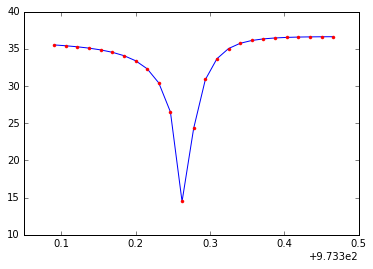

In [52]:
plot(new_res.frequency/1e6,dB(new_model_s21))
plot(new_res.frequency/1e6,dB(new_res.data),'r.')

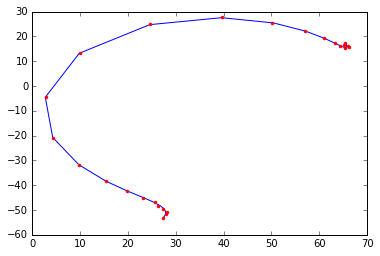

In [53]:
plot_ri(new_model_s21)
plot_ri(new_res.data,'r.')

In [55]:
res1.Q

9462.4611036527422

In [56]:
new_res.Q

9566.2894580348529

In [57]:
res1.f_0

973576796.21184409

In [58]:
new_res.f_0

973577861.66552234

In [59]:
res1.Q_i, new_res.Q_i

(186563.55725511286, 178065.71593363836)